In [51]:
import numpy as np
import pandas as pd

In [75]:
# Data Collection
data =  pd.read_csv("diabetes_dataset.csv")
display(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [53]:
# Standardization

# Example dataset (rows = samples, columns = features)
# data = np.array([
#     [2.5, 2.4],
#     [0.5, 0.7],
#     [2.2, 2.9],
#     [1.9, 2.2],
#     [3.1, 3.0],
#     [2.3, 2.7],
#     [2.0, 1.6],
#     [1.0, 1.1],
#     [1.5, 1.6],
#     [1.1, 0.9]
# ])

# 1. Calculate mean for each feature (column)
mean = np.mean(data, axis=0)

# 2. Calculate standard deviation for each feature (column)
std_dev = np.std(data, axis=0)

# 3. Standardize the dataset
standardized_data = (data - mean) / std_dev

print("Original Data:")
print(data)
print("\nMean of each feature:")
print(mean)
print("\nStandard Deviation of each feature:")
print(std_dev)
print("\nStandardized Data:")
print(standardized_data)


Original Data:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1   

In [54]:
# Covariance Matrix Calculation

# Step 1: Calculate the covariance matrix
# Method 1: Using the formula
n_samples = standardized_data.shape[0]
cov_matrix_manual = (standardized_data.T @ standardized_data) / (n_samples - 1)

# Method 2: Using NumPy's built-in function for validation (For test)
# cov_matrix_numpy = np.cov(standardized_data, rowvar=False)

print("Standardized Data:")
print(standardized_data)
print("\nCovariance Matrix (Manual Calculation):")
print(cov_matrix_manual)

# For test
# print("\nCovariance Matrix (Using np.cov):") 
# print(cov_matrix_numpy)

Standardized Data:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigre

In [77]:
cov_matrix_manual.shape

(9, 9)

<AxesSubplot: >

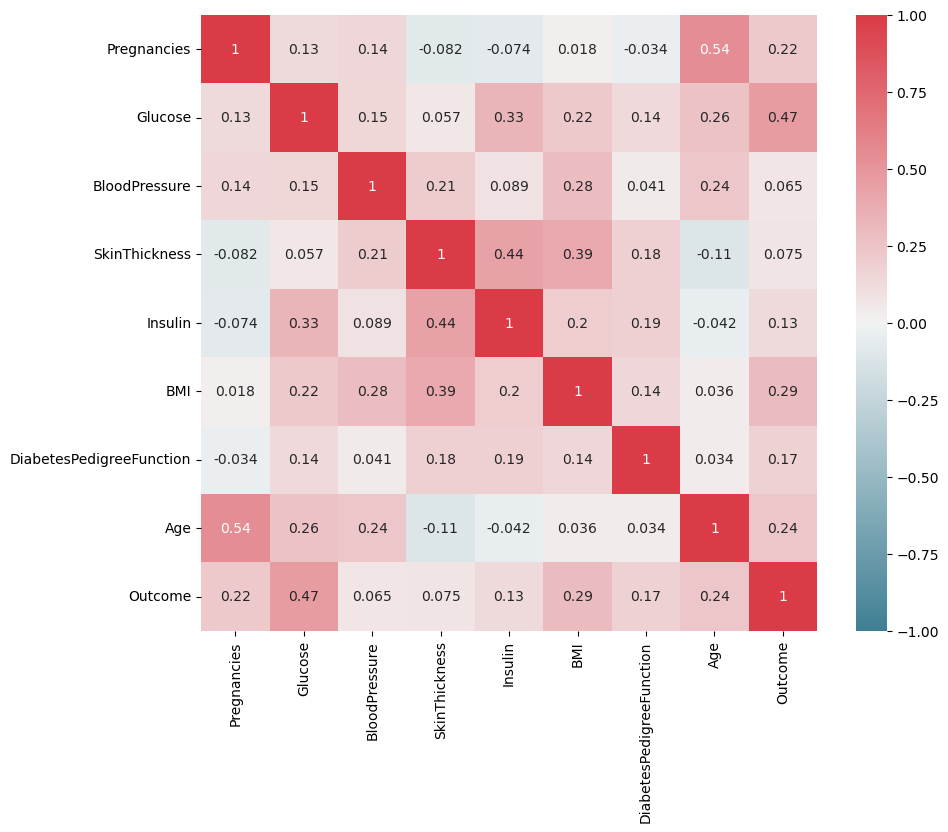

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True,),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax,annot=True)

In [56]:
# Eigenvalues and Eigenvectors

# Step 1: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_manual)

# Step 2: Sort eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Display results
print("Covariance Matrix:")
print(cov_matrix_manual)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Covariance Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.001304  0.129627       0.141466      -0.081778   
Glucose                      0.129627  1.001304       0.152789       0.057403   
BloodPressure                0.141466  0.152789       1.001304       0.207641   
SkinThickness               -0.081778  0.057403       0.207641       1.001304   
Insulin                     -0.073630  0.331789       0.089049       0.437352   
BMI                          0.017706  0.221359       0.282173       0.393085   
DiabetesPedigreeFunction    -0.033566  0.137516       0.041319       0.184167   
Age                          0.545051  0.263858       0.239840      -0.114119   
Outcome                      0.222187  0.467190       0.065153       0.074850   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073630  0.017706                 -0.033566   
Glucose               

In [57]:
# ถ้าแบบว่ากูกดรัน มันจะขึ้นรันของมึงด้วยมั้ยอะ ใช่
# run เลย ตอนนี้เหมือนมึงมาทำงานบนเครื่องกุ

In [58]:
# Principal Components

# Step 1: Select top k principal components (e.g., k=1)
k = 2
top_eigenvectors = eigenvectors[:, :k]

# Step 2: Transform the dataset
transformed_data = standardized_data @ top_eigenvectors

# Display results
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
print(f"\nTop {k} Principal Component(s):")
print(top_eigenvectors)
print("\nTransformed Data:")
print(transformed_data)

Eigenvalues:
[2.35556873 1.77662535 1.12168566 0.88310476 0.84572462 0.73582635
 0.4890602  0.41872635 0.38541202]

Eigenvectors:
[[ 0.21599835  0.52744611  0.16451225 -0.16088274  0.21176571 -0.4567731
   0.07851795 -0.54064221  0.26505155]
 [ 0.43675677  0.09563451 -0.39141738  0.32712336  0.10877916  0.38274945
  -0.20799965  0.02524536  0.58107579]
 [ 0.30045538  0.04625339  0.62970532 -0.01105718 -0.05937792  0.6078671
   0.32670833 -0.16280013 -0.06830645]
 [ 0.30729203 -0.44839783  0.29432599 -0.07401586  0.1718095  -0.39795678
   0.28199843  0.43491377  0.39477039]
 [ 0.33633235 -0.35534569 -0.14165347  0.09763514  0.65037442 -0.00873019
  -0.08221649 -0.26883758 -0.47845101]
 [ 0.39734198 -0.21031643  0.2519303   0.16321892 -0.52745778 -0.24100789
  -0.57252374 -0.16646311 -0.12644026]
 [ 0.23763447 -0.17519467 -0.2853247  -0.87352658 -0.15655457  0.17162837
  -0.05719014 -0.09316407  0.04961786]
 [ 0.27865556  0.53320237  0.1261179  -0.17111166  0.20428857  0.00105491
  -0.29

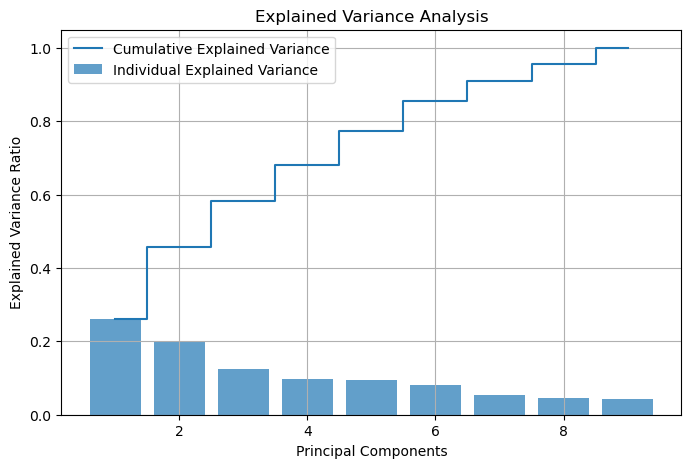

Eigenvalues:
[2.35556873 1.77662535 1.12168566 0.88310476 0.84572462 0.73582635
 0.4890602  0.41872635 0.38541202]

Explained Variance Ratio:
[0.26138907 0.19714578 0.12446946 0.09799499 0.09384705 0.08165203
 0.05426927 0.04646457 0.0427678 ]

Cumulative Explained Variance:
[0.26138907 0.45853485 0.58300431 0.68099929 0.77484634 0.85649836
 0.91076763 0.9572322  1.        ]


In [59]:
# Explained Variance Analysis

# Step 1: Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Step 2: Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Step 3: Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenvalues) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(eigenvalues) + 1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Analysis')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Display results
print("Eigenvalues:")
print(eigenvalues)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

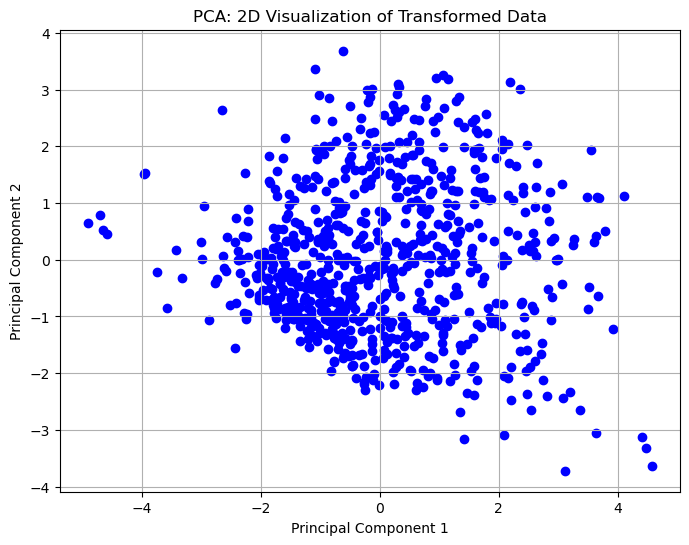

Transformed Data (2D):
            0         1
0    1.756947  1.111743
1   -1.507421 -0.559406
2    0.650822  1.929576
3   -1.587398 -1.065075
4    2.483374 -2.359563
..        ...       ...
763  1.283069  1.211187
764 -0.502281 -0.674135
765 -0.574088  0.033816
766 -0.172699  1.322892
767 -1.321267 -1.027489

[768 rows x 2 columns]


In [69]:
# Visualization
# transformed_data = np.random.rand(768, 1)
# Step 7: Plot the transformed 2D data
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[0], transformed_data[1], color='blue', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Visualization of Transformed Data')
plt.grid(True)
plt.show()

# Display results (optional)
print("Transformed Data (2D):")
print(transformed_data)


In [43]:
transformed_data.shape


(768, 2)

In [42]:
print(transformed_data)

            0         1
0    1.756947  1.111743
1   -1.507421 -0.559406
2    0.650822  1.929576
3   -1.587398 -1.065075
4    2.483374 -2.359563
..        ...       ...
763  1.283069  1.211187
764 -0.502281 -0.674135
765 -0.574088  0.033816
766 -0.172699  1.322892
767 -1.321267 -1.027489

[768 rows x 2 columns]


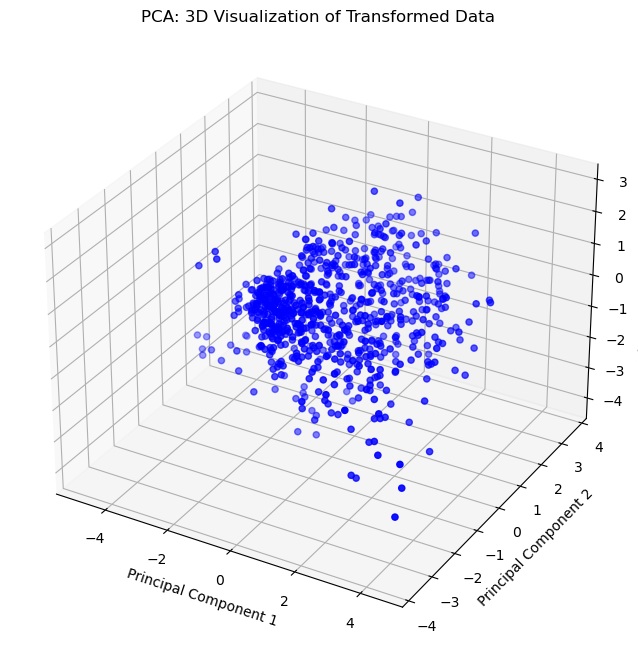

Transformed Data (3D):
            0         1         2
0    1.756947  1.111743 -0.208791
1   -1.507421 -0.559406  0.650628
2    0.650822  1.929576 -2.007740
3   -1.587398 -1.065075  0.474442
4    2.483374 -2.359563 -2.925515
..        ...       ...       ...
763  1.283069  1.211187  2.049198
764 -0.502281 -0.674135  0.632213
765 -0.574088  0.033816  0.419653
766 -0.172699  1.322892 -1.124947
767 -1.321267 -1.027489  0.786445

[768 rows x 3 columns]


In [71]:
# 3D for optional 

from mpl_toolkits.mplot3d import Axes3D

# Step 5: Select top 3 principal components (k=3)
top_eigenvectors_3d = eigenvectors[:, :3]

# Step 6: Transform the data into the new 3D space (project data onto top 3 eigenvectors)
transformed_data_3d = standardized_data @ top_eigenvectors_3d

# Step 7: Plot the transformed 3D data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_3d[0], transformed_data_3d[1], transformed_data_3d[2], color='blue', marker='o')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA: 3D Visualization of Transformed Data')

plt.show()

# Display results (optional)
print("Transformed Data (3D):")
print(transformed_data_3d)

Eigenvalues (Your Implementation): [2.35556873 1.77662535]
Eigenvalues (Sklearn): [2.35556873 1.77662535]

Transformed Data (Your Implementation):
          0         1
0  1.756947  1.111743
1 -1.507421 -0.559406
2  0.650822  1.929576
3 -1.587398 -1.065075
4  2.483374 -2.359563

Transformed Data (Sklearn):
[[-1.75694707 -1.11174258]
 [ 1.50742148  0.55940565]
 [-0.65082201 -1.92957633]
 [ 1.58739782  1.06507465]
 [-2.48337392  2.35956252]]

Explained Variance Ratio (Sklearn): [0.26138907 0.19714578]


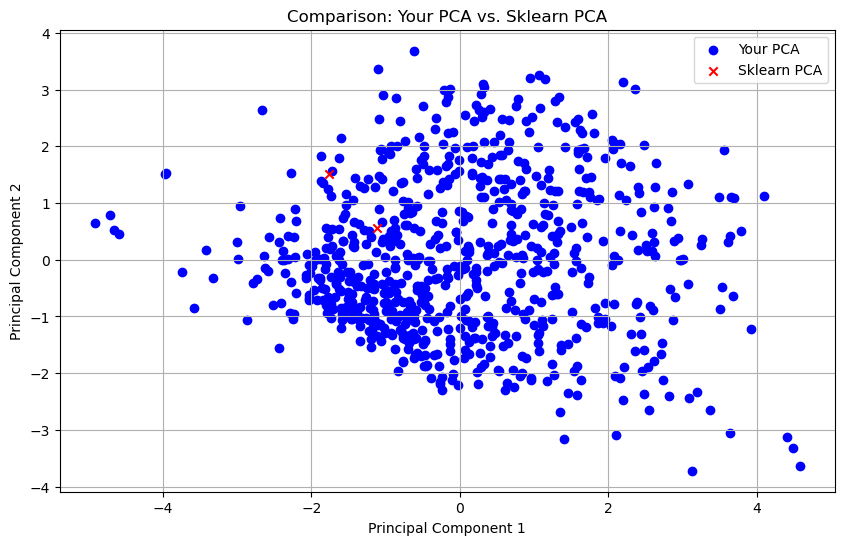

In [73]:
# Compare with libary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




# Use Sklearn's StandardScaler for consistent results
scaler = StandardScaler()
standardized_data_sklearn = scaler.fit_transform(data)

### 2. Compute PCA with your implementation
# Covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Transform data using top 2 principal components
top_eigenvectors = eigenvectors[:, :2]
transformed_data = standardized_data @ top_eigenvectors

### 3. Compute PCA with Sklearn
pca = PCA(n_components=2)
X_pca = pca.fit_transform(standardized_data_sklearn)

# Extract eigenvalues and explained variance ratio from Sklearn
sklearn_eigenvalues = pca.explained_variance_
sklearn_explained_variance_ratio = pca.explained_variance_ratio_

### 4. Compare Results

# Compare Eigenvalues
print("Eigenvalues (Your Implementation):", eigenvalues[:2])
print("Eigenvalues (Sklearn):", sklearn_eigenvalues)

# Compare Transformed Data
print("\nTransformed Data (Your Implementation):")
print(transformed_data[:5])  # Show first 5 samples
print("\nTransformed Data (Sklearn):")
print(X_pca[:5])  # Show first 5 samples

# Compare Explained Variance Ratios
print("\nExplained Variance Ratio (Sklearn):", sklearn_explained_variance_ratio)

### 5. Plot Results for Visual Confirmation

# Plot your implementation vs. Sklearn's PCA
plt.figure(figsize=(10, 6))

plt.scatter(transformed_data[0], transformed_data[1], color='blue', label='Your PCA')
plt.scatter(X_pca[0], X_pca[1], color='red', marker='x', label='Sklearn PCA')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Comparison: Your PCA vs. Sklearn PCA')
plt.legend()
plt.grid(True)
plt.show()
